<h1 align='center' style='color:purple'><b>Red Wine Quality</b></h1>

Red wine is a type of wine made from dark-colored grape varieties. The actual color of the wine can range from intense violet, typical of young wines, through to brick red for mature wines and brown for older red wines.

**Goal of the case study**  
The problem statement is that we need to predict the quality of wine with respect to different parameters such as alcohol, acidity, density, pH, etc using an Artificial Neural Network (ANN).

# Outline
1. Import Datasets
2. Missing Value's Imputation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Model Building
6. Model Evaluation

In [1]:
# Import Pandas and NumPy
import numpy as np 
import pandas as pd

# Import Libraries for plotting
import matplotlib.pyplot as plt, seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Change pandas settings to Display all columns
pd.set_option('display.max_columns',None)

We will be using [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) data visualization libraries.  
Seaborn is a library  library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### 1. Import Datasets

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

### Lets have a look at each datasets

In [3]:
print('Shape of general_data :',wine_df.shape)
wine_df.head()

Shape of general_data : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This Dataset contains 11 different features which affect the quality of red wine.

#### Lets have a look at the Input variables (based on physicochemical tests):  

- fixed acidity : non-volatile acids that do not evaporate readily

- volatile acidity : are high acetic acid in wine which leads to an unpleasant vinegar taste

- citric acid : acts as a preservative, adds freshness and flavor to wines

- residual sugar : amount of sugar remaining after fermentation stops

- chlorides : the amount of salt in the wine

- free sulfur dioxide : prevents microbial growth

- total sulfur dioxide : amount of free + bound forms of SO2

- density : density of wine (affects sweetness)

- pH :  is a scale used to specify the acidity or basicity of wine

- sulphates : sulphate content

- alcohol : alcohol content

- quality - quality (score between 0 and 10, Output variable (based on sensory data))

#### Let's check column data types

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- All input features are numerical, so we dont need to encode anything.

#### Let's Check the distribution of numerical columns

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- There are outliers present in a few features like 'residual sugar', 'total sulfur dioxide' as their max value is much higher compared to the 75th percentile value.

## 2. Missing Value's Imputation

#### Check for missing Values

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Missng values present.

## 3. Exploratory Data Analysis

#### Let's check the distribution of each Input Features using [Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)  
histplot is used to Plot univariate or bivariate histograms to show distributions of a variable.A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

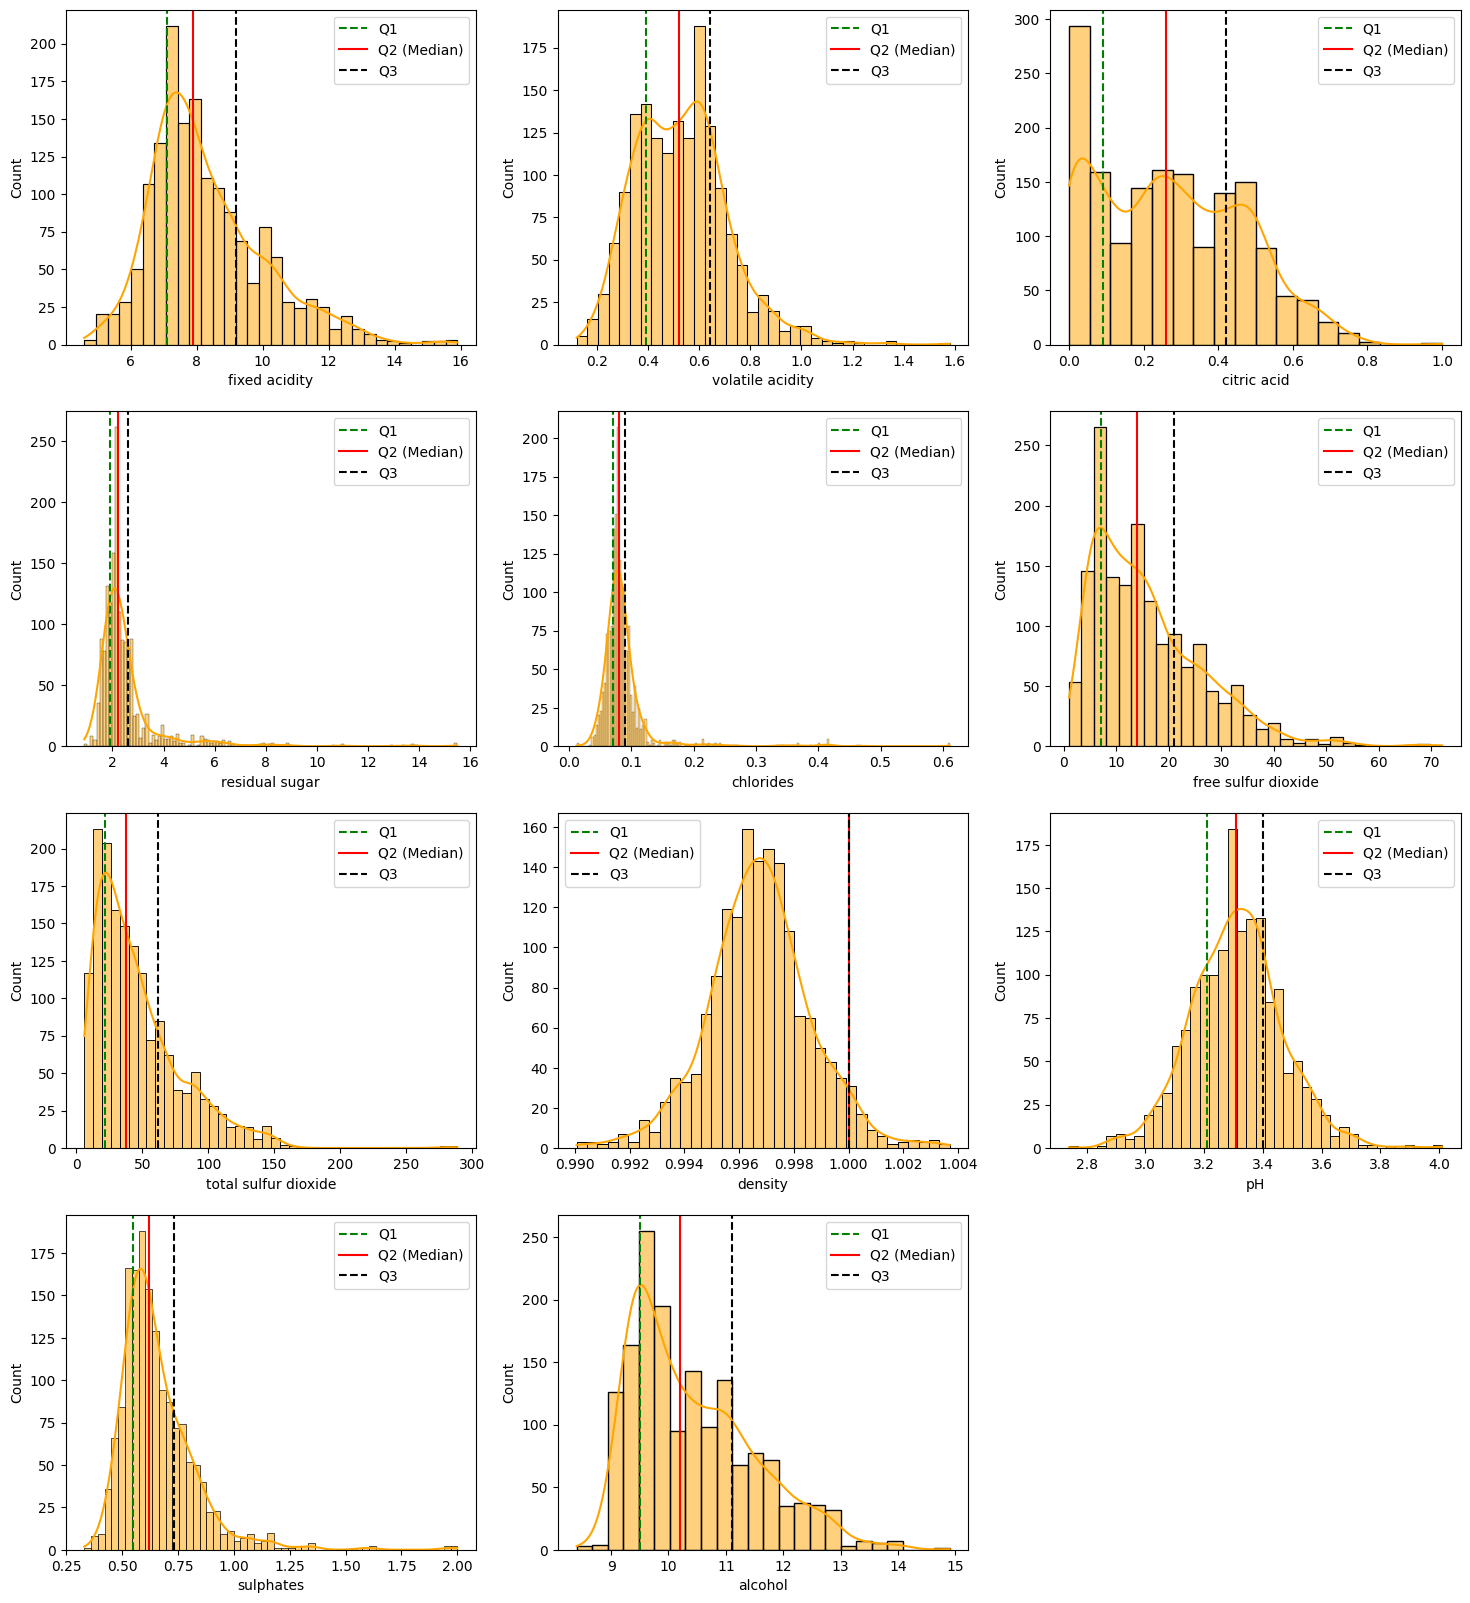

In [7]:
feature_ = wine_df.columns[:-1] # Skip the target variable 'quality'. Later, we weill plot it separately

def get_percentile(feature, q_range):
    """This function is used to calculate the percentile for the passed input feature present
    in wine_df dataframe. After calculation, the value is rounded upto the second decimal place and returned.
    Args:
        feature: the feature(present in wine_df dataframe) for which the quantile needs to be calculated.
        q_range: used to define which percentile value (example - 50 for calculating 50th percentile(median))
    returns:
    dist: the quantile value
    """
    dist = wine_df[feature].describe()[str(q_range) + '%']
    return round(dist,2)

def render_counterplot():
    fig=plt.figure(figsize=(18, 20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4, 3, column + 1)
        
        q1 = get_percentile(feature, 25)
        q2 = get_percentile(feature, 50)
        q3 = get_percentile(feature, 75)
          
        sns.histplot(data=wine_df, x=feature, kde=True, color = 'orange')
        
        plt.axvline(q1, linestyle='--', color='green', label='Q1')
        plt.axvline(q2, color='red', label='Q2 (Median)')
        plt.axvline(q3, linestyle='--',  color='black', label='Q3')
        plt.legend()
        
    plt.show()
    
render_counterplot()

- In univariate analysis, it was observed that a input features like 'chlorides', 'residual sugar', 'total sulphur dioxide', 'sulphates' are skewed due to the presence of outliers.

**[Skewness](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/)**  
Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode. The mode marks the response value on the x-axis that occurs with the highest probability. A distribution is skewed if the tail on one side of the mode is fatter or longer than on the other: it is asymmetrical.  
In an asymmetrical distribution : 
- a **negative skew** indicates that the tail on the left side is longer than on the right side (left-skewed)  
- a **positive skew** indicates the tail on the right side is longer than on the left (right-skewed).  
  
  
Asymmetric distributions occur when **extreme values(or Outliers**) lead to a distortion of the normal distribution.

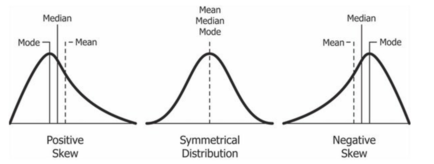

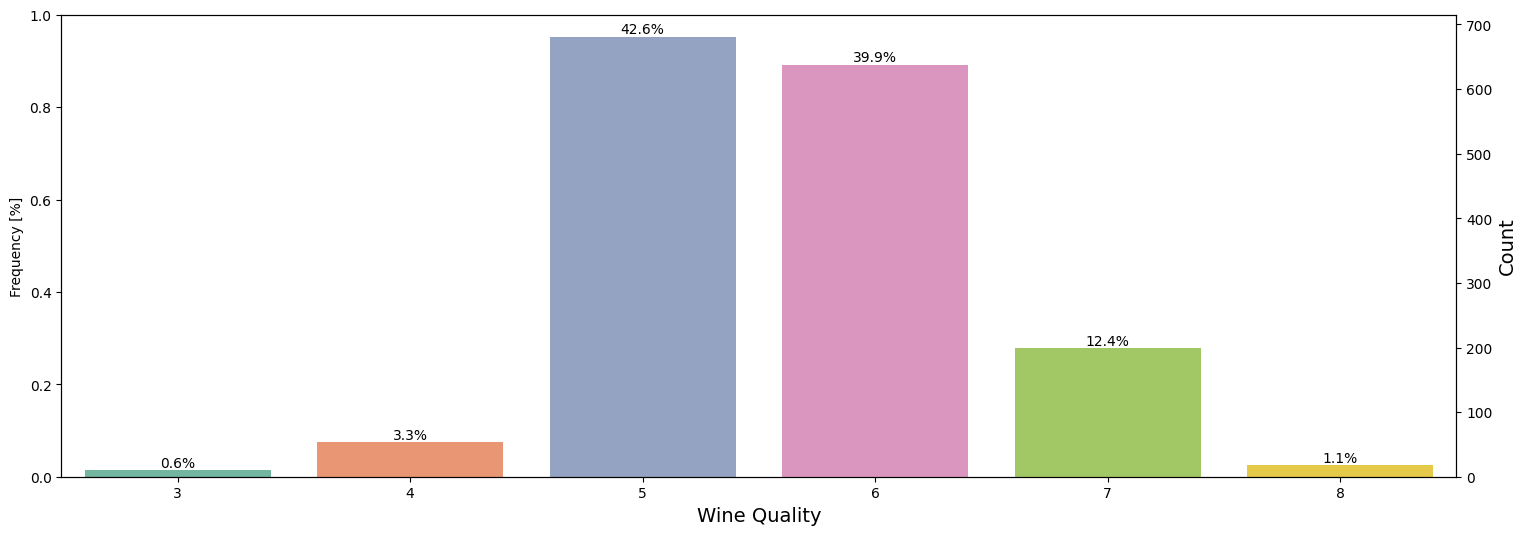

In [8]:
# Initialize a figure for plotting the Distribution of target class 'quality'
plt.figure(figsize = (18,6))
    
# Generate a countplot for the passed feature_name
ax1 = sns.countplot(x='quality', data=wine_df, palette='Set2')        
# set title, xlabel, ylabel, legend
plt.xlabel('Wine Quality',fontsize  = 14)
plt.ylabel('Count',fontsize  = 14)

# Make twin axis
ax2=ax1.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()

# Also switch the labels over
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(wine_df)), (x.mean(), y), ha='center', va='bottom')

- There is a huge [Class imbalance](https://machinelearningmastery.com/what-is-imbalanced-classification/#:~:text=Imbalanced%20classification%20refers%20to%20a,is%20instead%20biased%20or%20skewed.) in the target variable 'quality'.  
- Out of 6 Categories, category 5 and 6 together have around 82.5% of the records.

#### Lets check the distribution of Input Features with respect to target variable using a [Box-plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)  
In descriptive statistics, a box-plot or boxplot (also known as box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (first, second (median), third ), Maximum and Minimum values as shown in the image below.

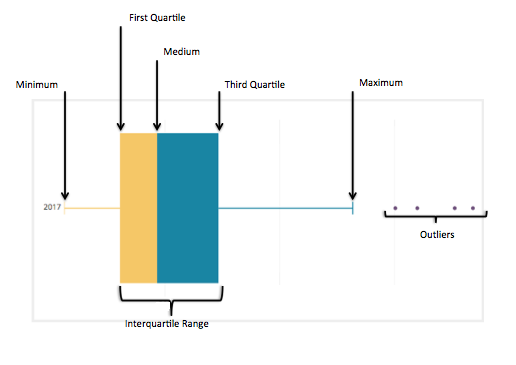

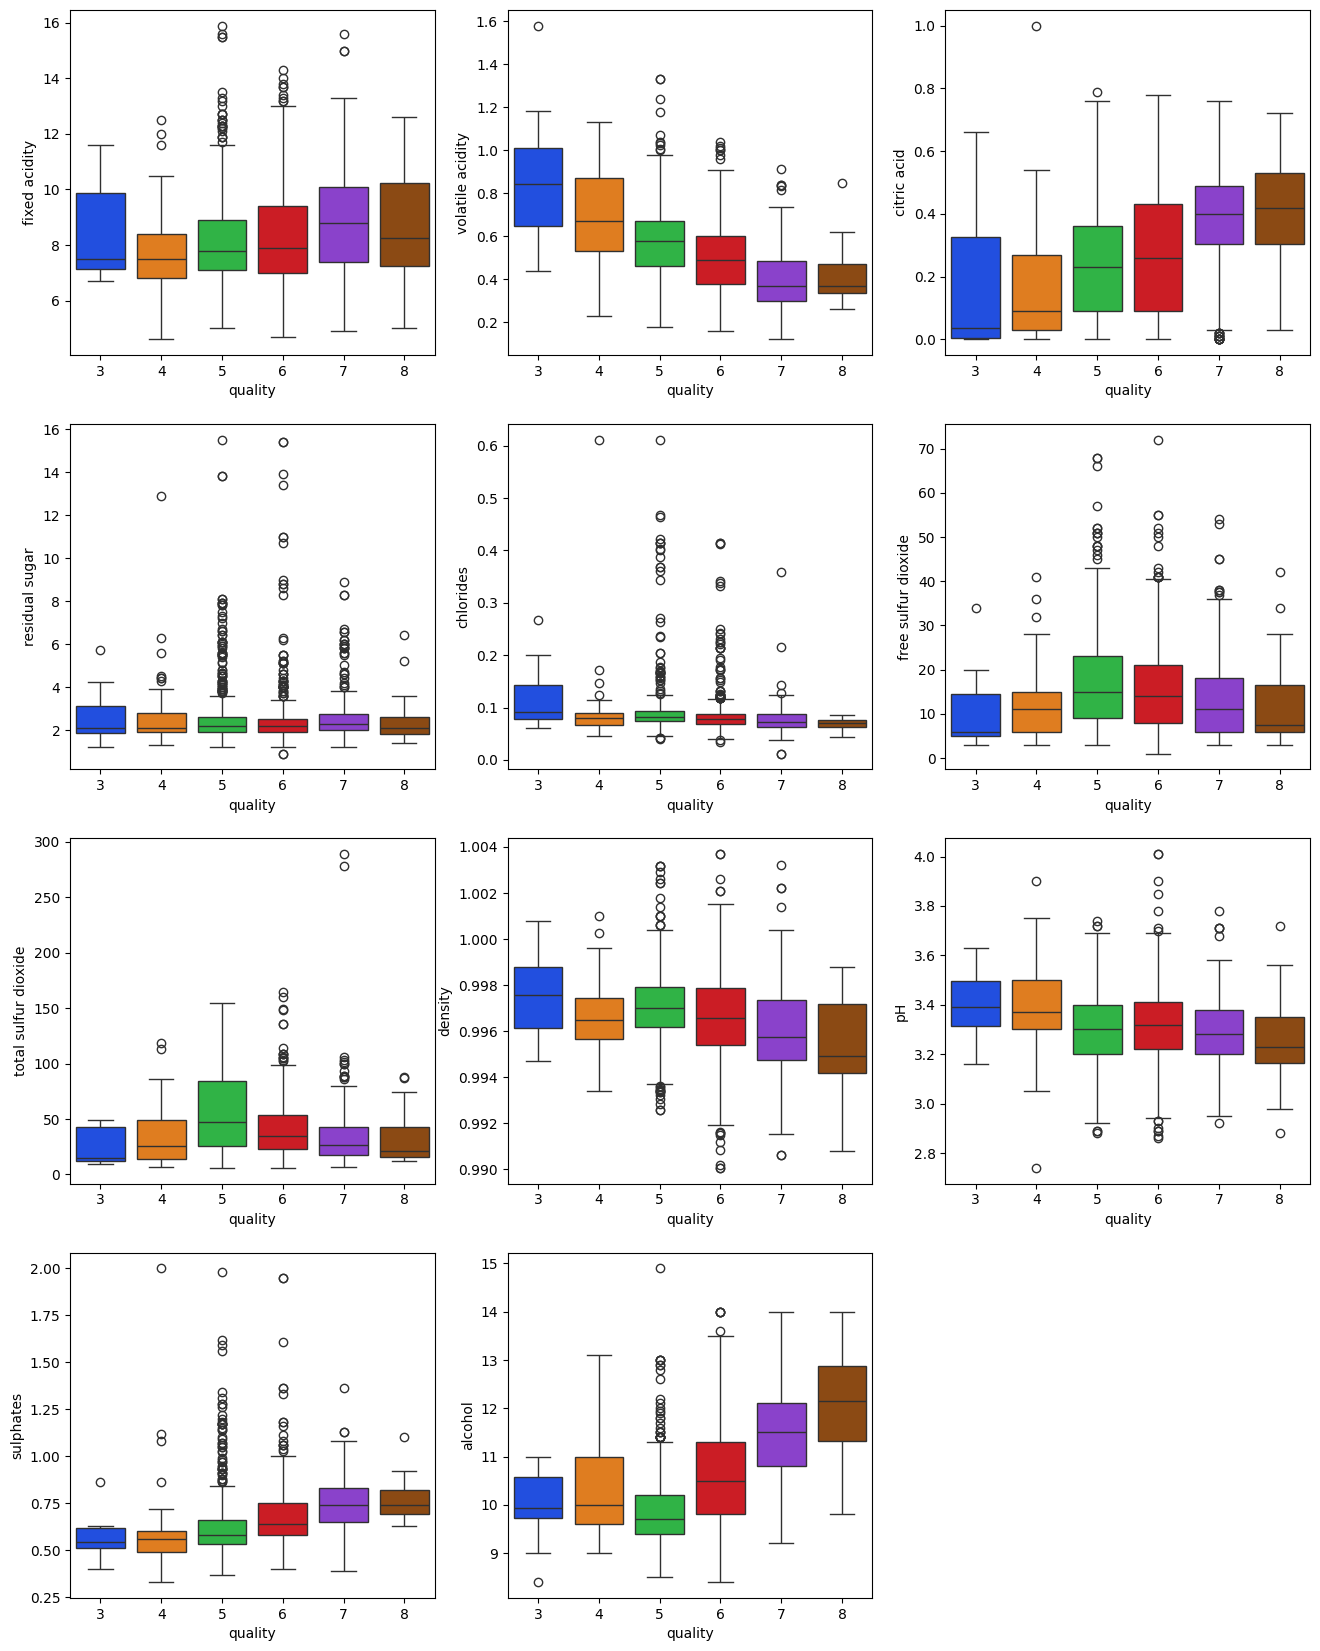

In [9]:
features_ = wine_df.columns.values[:-1]

fig=plt.figure(figsize=(16, 26))
for column, feature in enumerate(features_):
    if feature != "quality":
        fig.add_subplot(5, 3, column + 1)
        sns.boxplot(data=wine_df, x="quality", y=feature, color="#8585f2", palette="bright")
    
plt.show()

No major pattern observed in [bivariate analysis](https://en.wikipedia.org/wiki/Bivariate_analysis#:~:text=Bivariate%20analysis%20is%20one%20of,testing%20simple%20hypotheses%20of%20association.)  
- The distribution of 'sulphates', 'alcohol' and 'citric acid' tend to increase with increasing wine quality. So, we can say that they are positively related.
- The distribution of 'volatile acidity', 'density' and 'ph' tend to decrease with increasing wine quality. So, we can say that they are negatively related.

### Key take-aways from EDA :  

- Based on the univariate analysis of feature, it was observed that a few Features are highly skewed which implies that extreme outliers are present.
- Based on the Bi-variate analysis, it was observed that a Few features were positively or negatively correlated with the target variable. 
- The target variable 'quality' is highly imbalanced which can affect machine learning model's performance.

## 4. Feature Engineering

#### Calculate Feature Importance (using [RandomForest's Feature Importance attribute](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e))

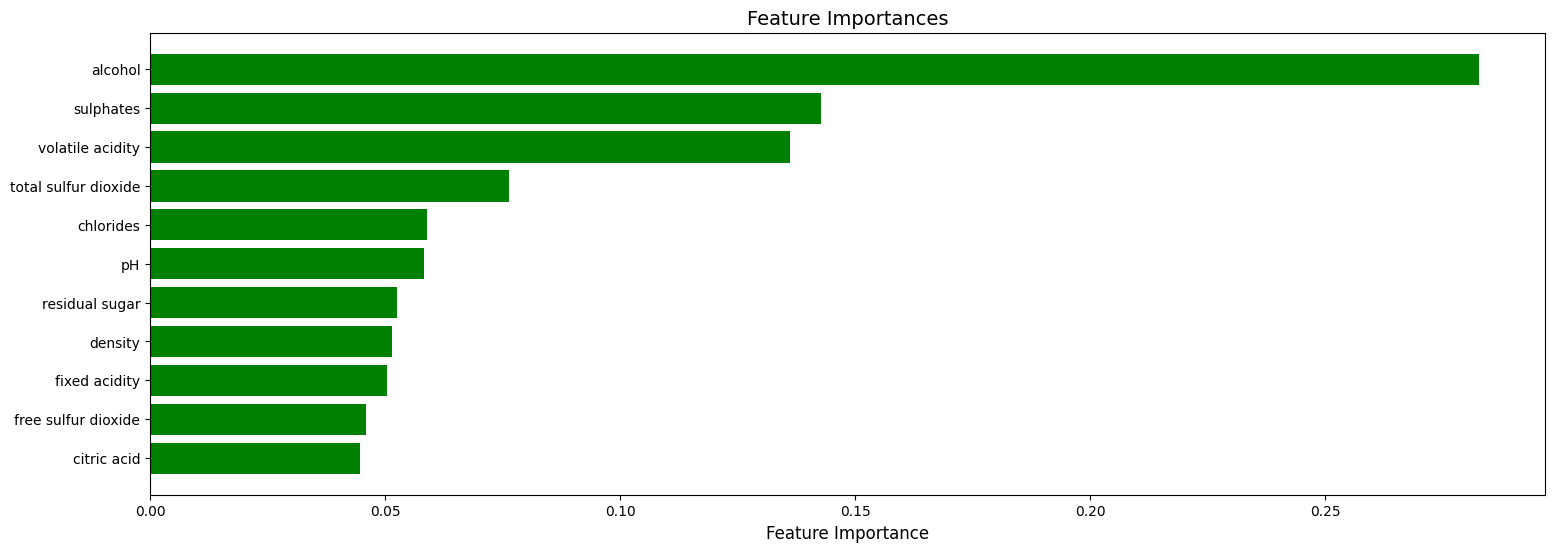

In [10]:
# Let's use Random Forest Model to calculate Importance of Each Feature

# Import and initialize randomforest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, max_depth=12)

# prepare training data for this model
x = wine_df.drop(['quality'] , axis = 1)

# Train Model
rf.fit(x, wine_df.quality)

# store importance and feature names
features = wine_df.columns    # store feature names
importances = rf.feature_importances_    # get feature importance score from randomforest model using .feature_importance_ attribute
sorted_index = np.argsort(importances)[:]    # sort importance in descending order

# Plot Feature Importance
plt.figure(figsize=(18,6))
plt.title('Feature Importances', fontsize= 14)
plt.barh(range(len(sorted_index)), importances[sorted_index], color='green', align='center')
plt.yticks(range(len(sorted_index)), [features[i] for i in sorted_index]) # set x-axis ticks as feature names
plt.xlabel('Feature Importance', fontsize= 12)
plt.show()


- Alcohol content greatly affects the wine quality. Sulphates, volatile acidity and sulphur dioxide are also important for wine quality prediction.  
- As the importance of citric acid and free sulphur dioxide is very low, we can avoid them in model building.

#### Drop 'free sulfur dioxide','citric acid' because of thier lower importance

In [4]:
wine_df.drop(['free sulfur dioxide','citric acid'],axis=1,inplace=True)

### Split Features and Target

In [5]:
# Input Features
X = wine_df.drop('quality', axis = 1)

# Target Variable
y = wine_df['quality']

#### Split Training and Testing Data using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42)

Keep stratify = y, because we want [stratified](https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter) training and testing data. It means that all 6 categories of target variable will be present in equal ratio in both training and testing data.

#### Standardize input columns suing [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# standardize all columns of training and testing data
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

#### Check for multi-collinearity

In [9]:
# Save the training data in a separate df which will be used for finding coorelation
df_corr = X_train.copy()

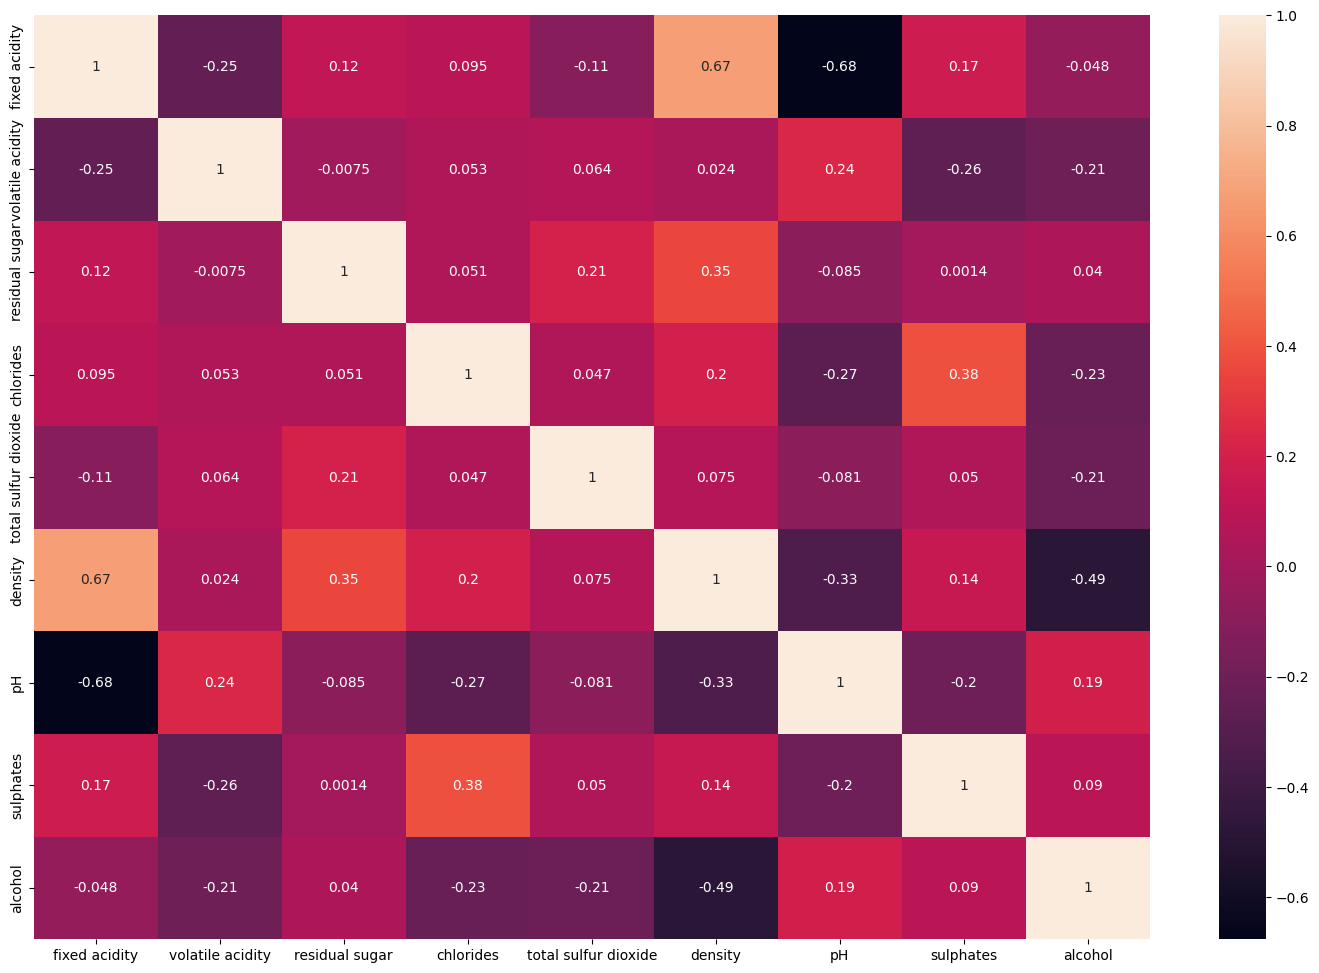

In [10]:
# plot a heatmap of correlation in training data
plt.figure(figsize = (18,12))

# seaborn heatmap
sns.heatmap(df_corr.corr(),cbar=True, annot=True) # annot=True shows value in each file of heatmap, cbar shows the colour scale
plt.show()

A slight multi collinearity is observed in a few features. But, the level of collinearity is not very high. So we will not drop any feature.

#### Lets have a look at the training data again

In [17]:
X_train.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
1070,0.568736,-1.103037,-0.736729,-0.636853,-0.302258,-0.940708,-0.845406,1.314752,0.627630
563,-0.420879,-1.327359,0.100482,0.080037,0.391344,0.185132,0.005595,-0.298047,-0.308238
523,0.568736,-0.710475,-0.039053,-0.063341,2.864186,0.556871,-0.583560,-0.643646,-0.963346
1227,0.394099,0.298972,-0.387891,0.325828,-0.784763,0.498455,-0.256251,0.335553,-0.776172
1399,-0.653729,0.803695,-0.248356,-0.411544,-0.694293,-0.611453,0.725674,0.335553,0.627630


Everything look fine! Lets go ahead with Model Building.

## Lets Over-Sample the training Data  

As, there are 6 categories in the target variable and out of it 2 variables have more than 80% of records.  

Imbalanced dataset pose a challenge for predictive modeling as most of the machine learning algorithms used for classification are designed around the assumption of an equal number of examples for each class. So, training a model on imbalanced dataset results in poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

For this purpose We will over-sample the minority class (1's) in the target variable and make the number of 0's(majority class) and 1's(minority class) equal.

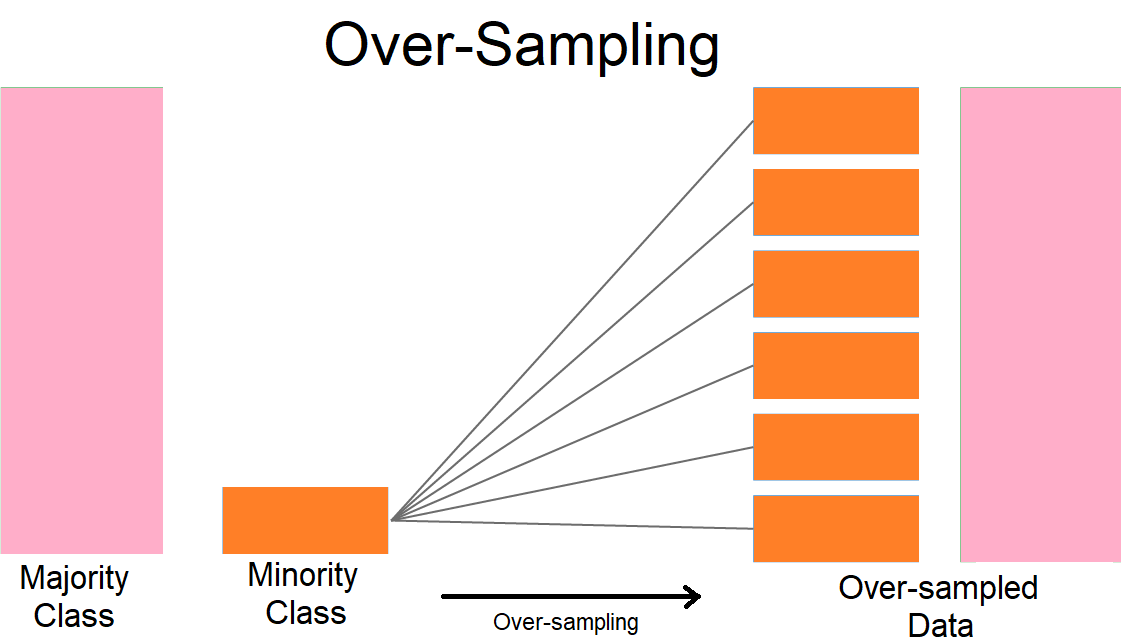

We will be using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) for over-sampling purpose. It works by selecting minority samples that are close in the feature space, drawing a line between these samples in the feature space and drawing a new sample at a point along that line.

Specifically, a random sample from the minority class is first chosen. Then k of the nearest neighbors for that sample are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

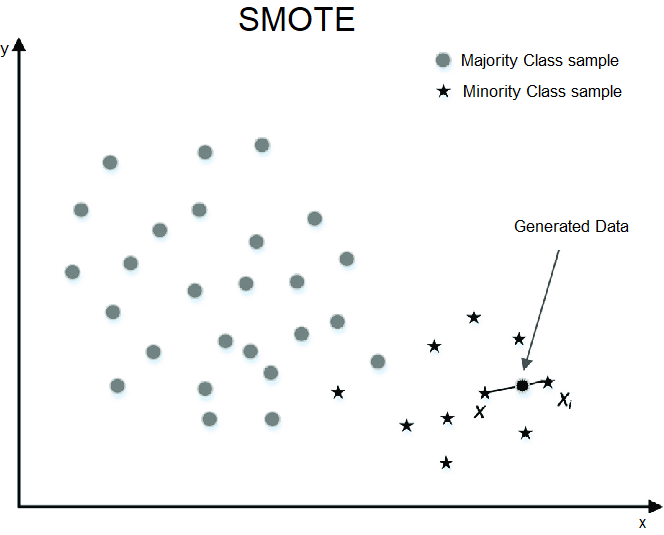

### Perform training data over-sampling

In [8]:
# Import Synthetic minority over-sampling from imblearn libraray
from imblearn.over_sampling import SMOTE

In [9]:
smte = SMOTE(random_state=42)
X_train_os, y_train_os = smte.fit_resample(X_train,y_train)  # Fit SMOTE with training data and re-sample the data to get balanced data.

print('Training data classes :5\'s   6\'s   7\'s   4\'s  8\'s 3\'s')
print('Before over-sampling   {}   {}   {}   {}   {}   {}'.format(list(y_train.value_counts().values)[0],list(y_train.value_counts().values)[1],list(y_train.value_counts().values)[2],list(y_train.value_counts().values)[3],list(y_train.value_counts().values)[4],list(y_train.value_counts().values)[5]))
print('After over-sampling    {}   {}   {}   {}  {}  {}\n'.format(list(y_train_os.value_counts().values)[0],list(y_train_os.value_counts().values)[1],list(y_train_os.value_counts().values)[2],list(y_train_os.value_counts().values)[3],list(y_train_os.value_counts().values)[4],list(y_train_os.value_counts().values)[5]))

print('After Over-sampling {} synthetic records were added to the training data and now there are equal proportion of records from each class'.format(len(X_train_os)-len(X_train)))

  File "C:\Users\HARSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HARSH\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HARSH\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\HARSH\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Training data classes :5's   6's   7's   4's  8's 3's
Before over-sampling   613   574   179   48   16   9
After over-sampling    613   613   613   613  613  613

After Over-sampling 2239 synthetic records were added to the training data and now there are equal proportion of records from each class


Since we are using categorical cross-entropy for training ANN model later in this project, we need to convert y_train_os and y_test into multi dimensional format.(kind of 1-hot encoding)  
For this purpose first we encode both target variable, convert it into dataframe and then use [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)to convert into binary class matrix.

In [10]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_os = le.fit_transform(y_train_os)
y_test = le.transform(y_test)

In [11]:
y_train_os = pd.DataFrame(y_train_os.reshape(len(y_train_os),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

Convert y_train_os and y_test into binary matrix representation.

In [12]:
import tensorflow as tf                     # use to_categorical function present in tensorflow library
y_train_os = tf.keras.utils.to_categorical(y_train_os, 6)
y_test = tf.keras.utils.to_categorical(y_test, 6)

## 5. Model Building  
We will be using  [Artificial Neural Network (ANN)](https://en.wikipedia.org/wiki/Artificial_neural_network) Model for this project.  

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute Human brains.  
ANN consists of multiple nodes, which imitate biological neurons of human brain. The neurons are connected by links and they interact with each other. The nodes can take input data and perform operations on the data. The result of these operations is passed to other neurons. The output at each node is called node value.

Artificial Neural Networks are made up of 3 types of layers:
- Input layer — initial data for the neural network.
- Hidden layers — intermediate layer between input and output layer and place where all the computation is done.
- Output layer — produce the result for given inputs.

Some Important points about ANN :
 - It is mostly used in supervised learning for instances such as classification, image recognition etc
 - it can be used for both classification and regression problems.
 - It can also handle non-linear data which was not possible in case of linear models.
 
Advantages :  
 - ANN learning methods are quite robust to noise in the training data.
 - It has fault tolerance.
 
Disadvantages :  
 - Unexplained functioning of the network
 - Hardware dependence:  Artificial neural networks require processors with parallel processing power, by their structure.

#### Let's see how an ANN model Works  
For Neural Netrowk model building we will be using [TensorFlow](https://www.tensorflow.org/) Library. TensorFlow is an open-source library developed by Google primarily for deep learning applications. It also supports traditional machine learning. TensorFlow was originally developed for large numerical computations without keeping deep learning in mind. However, it proved to be very useful for deep learning development as well.

In [13]:
# Import Necessary Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.layers import Dropout

- A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
- A densely-connected neural network layer. Dense implements the operation activation(matmul(input, weight) + bias) , where weight is a weight matrix, bias is a bias vector, and activation is an element-wise activation function.
- The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

<b> Creating dataset for an AND Gate</b>

In [14]:
# Inputs (These inputs resemble an AND gate)
x1 = np.array([[0,0], [0,1], [1,0], [1,1]], "uint8")

# Target
y1  = np.array([[0], [0], [0], [1]], "uint8")

#### Using Tensorflow Create a Sequential Model   
Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it. We use the 'add()' function to add layers to our model.

In [15]:
# Define sequential model
model = Sequential()

# Add output layer, here we just need to add 1 output layer, with 2 dimensional input and sigmoid activation function
model.add(Dense(units=1, activation='sigmoid',input_dim=2))

# Compile model and define the loss function, optimizers, and metrics for prediction
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here is how the Neural Network looks:

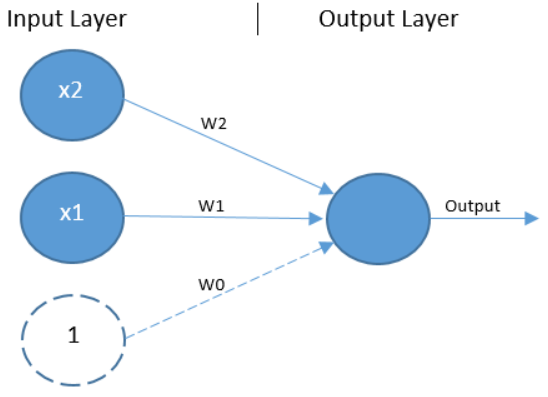

Here we are using 2 inputs x1, x2 (2 inputs of AND gate) and we have 1 output layer with only 1 neuron(output of AND gate) since we will be getting a single value as output.

<b>Train the Model</b>

In [17]:
model.fit(x1, y1, epochs=500)

Epoch 1/500


1/1 [==============================] - 3s 3s/step - loss: 0.8794 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 51ms/step - loss: 0.8786 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 50ms/step - loss: 0.8778 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8770 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.8762 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 0.8755 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8747 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 0.8739 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8731 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.8724 - accuracy: 0.5000
Epoch 11/500
1/1 [==

Epoch 1326/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4801 - acc: 0.5000
Epoch 1327/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4800 - acc: 0.5000
Epoch 1328/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4798 - acc: 0.5000
Epoch 1329/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4797 - acc: 0.5000
Epoch 1330/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4795 - acc: 0.5000
Epoch 1331/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4794 - acc: 0.5000
Epoch 1332/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4792 - acc: 0.5000
Epoch 1333/5000
4/4 [==============================] - 0s 253us/sample - loss: 0.4791 - acc: 0.5000
Epoch 1334/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4789 - acc: 0.5000
Epoch 1335/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4788 - acc: 0.5000


Epoch 1408/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4679 - acc: 0.7500
Epoch 1409/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4677 - acc: 0.7500
Epoch 1410/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4676 - acc: 1.0000
Epoch 1411/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4674 - acc: 1.0000
Epoch 1412/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4673 - acc: 1.0000
Epoch 1413/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4672 - acc: 1.0000
Epoch 1414/5000
4/4 [==============================] - 0s 495us/sample - loss: 0.4670 - acc: 1.0000
Epoch 1415/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4669 - acc: 1.0000
Epoch 1416/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4667 - acc: 1.0000
Epoch 1417/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4666 - acc: 1.0000


Epoch 1490/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4561 - acc: 1.0000
Epoch 1491/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4559 - acc: 1.0000
Epoch 1492/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4558 - acc: 1.0000
Epoch 1493/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4557 - acc: 1.0000
Epoch 1494/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4555 - acc: 1.0000
Epoch 1495/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4554 - acc: 1.0000
Epoch 1496/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4552 - acc: 1.0000
Epoch 1497/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4551 - acc: 1.0000
Epoch 1498/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4549 - acc: 1.0000
Epoch 1499/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4548 - acc: 1.0000


Epoch 1572/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4447 - acc: 1.0000
Epoch 1573/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4446 - acc: 1.0000
Epoch 1574/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4444 - acc: 1.0000
Epoch 1575/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4443 - acc: 1.0000
Epoch 1576/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4441 - acc: 1.0000
Epoch 1577/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4440 - acc: 1.0000
Epoch 1578/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4439 - acc: 1.0000
Epoch 1579/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4437 - acc: 1.0000
Epoch 1580/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4436 - acc: 1.0000
Epoch 1581/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4435 - acc: 1.0000


Epoch 1654/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4337 - acc: 1.0000
Epoch 1655/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4336 - acc: 1.0000
Epoch 1656/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4335 - acc: 1.0000
Epoch 1657/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.4333 - acc: 1.0000
Epoch 1658/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4332 - acc: 1.0000
Epoch 1659/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4331 - acc: 1.0000
Epoch 1660/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4329 - acc: 1.0000
Epoch 1661/5000
4/4 [==============================] - 0s 252us/sample - loss: 0.4328 - acc: 1.0000
Epoch 1662/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4327 - acc: 1.0000
Epoch 1663/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4325 - acc: 1.0000


Epoch 1736/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4231 - acc: 1.0000
Epoch 1737/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4230 - acc: 1.0000
Epoch 1738/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4229 - acc: 1.0000
Epoch 1739/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4228 - acc: 1.0000
Epoch 1740/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4226 - acc: 1.0000
Epoch 1741/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4225 - acc: 1.0000
Epoch 1742/5000
4/4 [==============================] - 0s 497us/sample - loss: 0.4224 - acc: 1.0000
Epoch 1743/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4223 - acc: 1.0000
Epoch 1744/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4221 - acc: 1.0000
Epoch 1745/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4220 - acc: 1.0000


Epoch 1818/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4129 - acc: 1.0000
Epoch 1819/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4128 - acc: 1.0000
Epoch 1820/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4127 - acc: 1.0000
Epoch 1821/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4126 - acc: 1.0000
Epoch 1822/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4124 - acc: 1.0000
Epoch 1823/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4123 - acc: 1.0000
Epoch 1824/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4122 - acc: 1.0000
Epoch 1825/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4121 - acc: 1.0000
Epoch 1826/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4119 - acc: 1.0000
Epoch 1827/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4118 - acc: 1.0000


Epoch 1900/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4031 - acc: 1.0000
Epoch 1901/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4029 - acc: 1.0000
Epoch 1902/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4028 - acc: 1.0000
Epoch 1903/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4027 - acc: 1.0000
Epoch 1904/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4026 - acc: 1.0000
Epoch 1905/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.4025 - acc: 1.0000
Epoch 1906/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.4024 - acc: 1.0000
Epoch 1907/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.4022 - acc: 1.0000
Epoch 1908/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.4021 - acc: 1.0000
Epoch 1909/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.4020 - acc: 1.0000


Epoch 1982/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3935 - acc: 1.0000
Epoch 1983/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3934 - acc: 1.0000
Epoch 1984/5000
4/4 [==============================] - 0s 997us/sample - loss: 0.3933 - acc: 1.0000
Epoch 1985/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3932 - acc: 1.0000
Epoch 1986/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3931 - acc: 1.0000
Epoch 1987/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3930 - acc: 1.0000
Epoch 1988/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3929 - acc: 1.0000
Epoch 1989/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3927 - acc: 1.0000
Epoch 1990/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3926 - acc: 1.0000
Epoch 1991/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3925 - acc: 1.0000


Epoch 2064/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3843 - acc: 1.0000
Epoch 2065/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3842 - acc: 1.0000
Epoch 2066/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3841 - acc: 1.0000
Epoch 2067/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3840 - acc: 1.0000
Epoch 2068/5000
4/4 [==============================] - 0s 248us/sample - loss: 0.3839 - acc: 1.0000
Epoch 2069/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3838 - acc: 1.0000
Epoch 2070/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3837 - acc: 1.0000
Epoch 2071/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3836 - acc: 1.0000
Epoch 2072/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3834 - acc: 1.0000
Epoch 2073/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3833 - acc: 1.0000


Epoch 2146/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3754 - acc: 1.0000
Epoch 2147/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.3753 - acc: 1.0000
Epoch 2148/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3752 - acc: 1.0000
Epoch 2149/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3751 - acc: 1.0000
Epoch 2150/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3750 - acc: 1.0000
Epoch 2151/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3749 - acc: 1.0000
Epoch 2152/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3748 - acc: 1.0000
Epoch 2153/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3747 - acc: 1.0000
Epoch 2154/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3746 - acc: 1.0000
Epoch 2155/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3745 - acc: 1.0000


Epoch 2228/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3668 - acc: 1.0000
Epoch 2229/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3667 - acc: 1.0000
Epoch 2230/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3666 - acc: 1.0000
Epoch 2231/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3665 - acc: 1.0000
Epoch 2232/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3664 - acc: 1.0000
Epoch 2233/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3663 - acc: 1.0000
Epoch 2234/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3662 - acc: 1.0000
Epoch 2235/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3661 - acc: 1.0000
Epoch 2236/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3660 - acc: 1.0000
Epoch 2237/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3659 - acc: 1.0000


Epoch 2310/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3585 - acc: 1.0000
Epoch 2311/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3584 - acc: 1.0000
Epoch 2312/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3583 - acc: 1.0000
Epoch 2313/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3582 - acc: 1.0000
Epoch 2314/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3581 - acc: 1.0000
Epoch 2315/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3580 - acc: 1.0000
Epoch 2316/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3579 - acc: 1.0000
Epoch 2317/5000
4/4 [==============================] - 0s 248us/sample - loss: 0.3578 - acc: 1.0000
Epoch 2318/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3577 - acc: 1.0000
Epoch 2319/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3576 - acc: 1.0000


Epoch 2392/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3504 - acc: 1.0000
Epoch 2393/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3503 - acc: 1.0000
Epoch 2394/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3502 - acc: 1.0000
Epoch 2395/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3501 - acc: 1.0000
Epoch 2396/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3500 - acc: 1.0000
Epoch 2397/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3499 - acc: 1.0000
Epoch 2398/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3498 - acc: 1.0000
Epoch 2399/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3497 - acc: 1.0000
Epoch 2400/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3496 - acc: 1.0000
Epoch 2401/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3495 - acc: 1.0000


Epoch 2474/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3425 - acc: 1.0000
Epoch 2475/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3425 - acc: 1.0000
Epoch 2476/5000
4/4 [==============================] - 0s 246us/sample - loss: 0.3424 - acc: 1.0000
Epoch 2477/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3423 - acc: 1.0000
Epoch 2478/5000
4/4 [==============================] - 0s 502us/sample - loss: 0.3422 - acc: 1.0000
Epoch 2479/5000
4/4 [==============================] - 0s 252us/sample - loss: 0.3421 - acc: 1.0000
Epoch 2480/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3420 - acc: 1.0000
Epoch 2481/5000
4/4 [==============================] - 0s 496us/sample - loss: 0.3419 - acc: 1.0000
Epoch 2482/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3418 - acc: 1.0000
Epoch 2483/5000
4/4 [==============================] - 0s 248us/sample - loss: 0.3417 - acc: 1.0000


Epoch 2556/5000
4/4 [==============================] - 0s 248us/sample - loss: 0.3350 - acc: 1.0000
Epoch 2557/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.3349 - acc: 1.0000
Epoch 2558/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3348 - acc: 1.0000
Epoch 2559/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3347 - acc: 1.0000
Epoch 2560/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3346 - acc: 1.0000
Epoch 2561/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.3345 - acc: 1.0000
Epoch 2562/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3344 - acc: 1.0000
Epoch 2563/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3343 - acc: 1.0000
Epoch 2564/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3342 - acc: 1.0000
Epoch 2565/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3341 - acc: 1.0000


Epoch 2638/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3276 - acc: 1.0000
Epoch 2639/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3275 - acc: 1.0000
Epoch 2640/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3274 - acc: 1.0000
Epoch 2641/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3273 - acc: 1.0000
Epoch 2642/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3272 - acc: 1.0000
Epoch 2643/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3271 - acc: 1.0000
Epoch 2644/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3271 - acc: 1.0000
Epoch 2645/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3270 - acc: 1.0000
Epoch 2646/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3269 - acc: 1.0000
Epoch 2647/5000
4/4 [==============================] - 0s 500us/sample - loss: 0.3268 - acc: 1.0000


Epoch 2720/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3204 - acc: 1.0000
Epoch 2721/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3204 - acc: 1.0000
Epoch 2722/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3203 - acc: 1.0000
Epoch 2723/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3202 - acc: 1.0000
Epoch 2724/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3201 - acc: 1.0000
Epoch 2725/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3200 - acc: 1.0000
Epoch 2726/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3199 - acc: 1.0000
Epoch 2727/5000
4/4 [==============================] - 0s 750us/sample - loss: 0.3198 - acc: 1.0000
Epoch 2728/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3198 - acc: 1.0000
Epoch 2729/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.3197 - acc: 1.0000


Epoch 2802/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3135 - acc: 1.0000
Epoch 2803/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3134 - acc: 1.0000
Epoch 2804/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3133 - acc: 1.0000
Epoch 2805/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3132 - acc: 1.0000
Epoch 2806/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3132 - acc: 1.0000
Epoch 2807/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3131 - acc: 1.0000
Epoch 2808/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3130 - acc: 1.0000
Epoch 2809/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3129 - acc: 1.0000
Epoch 2810/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3128 - acc: 1.0000
Epoch 2811/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3127 - acc: 1.0000


Epoch 2884/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3067 - acc: 1.0000
Epoch 2885/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3067 - acc: 1.0000
Epoch 2886/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3066 - acc: 1.0000
Epoch 2887/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3065 - acc: 1.0000
Epoch 2888/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3064 - acc: 1.0000
Epoch 2889/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3063 - acc: 1.0000
Epoch 2890/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3063 - acc: 1.0000
Epoch 2891/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3062 - acc: 1.0000
Epoch 2892/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3061 - acc: 1.0000
Epoch 2893/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.3060 - acc: 1.0000


Epoch 2966/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.3002 - acc: 1.0000
Epoch 2967/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.3001 - acc: 1.0000
Epoch 2968/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.3000 - acc: 1.0000
Epoch 2969/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2999 - acc: 1.0000
Epoch 2970/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2999 - acc: 1.0000
Epoch 2971/5000
4/4 [==============================] - 0s 503us/sample - loss: 0.2998 - acc: 1.0000
Epoch 2972/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2997 - acc: 1.0000
Epoch 2973/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2996 - acc: 1.0000
Epoch 2974/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2996 - acc: 1.0000
Epoch 2975/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2995 - acc: 1.0000


Epoch 3048/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2938 - acc: 1.0000
Epoch 3049/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2937 - acc: 1.0000
Epoch 3050/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2937 - acc: 1.0000
Epoch 3051/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2936 - acc: 1.0000
Epoch 3052/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2935 - acc: 1.0000
Epoch 3053/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2934 - acc: 1.0000
Epoch 3054/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2933 - acc: 1.0000
Epoch 3055/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2933 - acc: 1.0000
Epoch 3056/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2932 - acc: 1.0000
Epoch 3057/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2931 - acc: 1.0000


Epoch 3130/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2876 - acc: 1.0000
Epoch 3131/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2875 - acc: 1.0000
Epoch 3132/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2874 - acc: 1.0000
Epoch 3133/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2874 - acc: 1.0000
Epoch 3134/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2873 - acc: 1.0000
Epoch 3135/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2872 - acc: 1.0000
Epoch 3136/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2872 - acc: 1.0000
Epoch 3137/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2871 - acc: 1.0000
Epoch 3138/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2870 - acc: 1.0000
Epoch 3139/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2869 - acc: 1.0000


Epoch 3212/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2816 - acc: 1.0000
Epoch 3213/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2815 - acc: 1.0000
Epoch 3214/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2814 - acc: 1.0000
Epoch 3215/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.2813 - acc: 1.0000
Epoch 3216/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2813 - acc: 1.0000
Epoch 3217/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2812 - acc: 1.0000
Epoch 3218/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2811 - acc: 1.0000
Epoch 3219/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2810 - acc: 1.0000
Epoch 3220/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2810 - acc: 1.0000
Epoch 3221/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2809 - acc: 1.0000


Epoch 3294/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2757 - acc: 1.0000
Epoch 3295/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2756 - acc: 1.0000
Epoch 3296/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2755 - acc: 1.0000
Epoch 3297/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2755 - acc: 1.0000
Epoch 3298/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2754 - acc: 1.0000
Epoch 3299/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2753 - acc: 1.0000
Epoch 3300/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2752 - acc: 1.0000
Epoch 3301/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2752 - acc: 1.0000
Epoch 3302/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2751 - acc: 1.0000
Epoch 3303/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2750 - acc: 1.0000


Epoch 3376/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2699 - acc: 1.0000
Epoch 3377/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2699 - acc: 1.0000
Epoch 3378/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2698 - acc: 1.0000
Epoch 3379/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2697 - acc: 1.0000
Epoch 3380/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2697 - acc: 1.0000
Epoch 3381/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2696 - acc: 1.0000
Epoch 3382/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2695 - acc: 1.0000
Epoch 3383/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2695 - acc: 1.0000
Epoch 3384/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2694 - acc: 1.0000
Epoch 3385/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2693 - acc: 1.0000


Epoch 3458/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2644 - acc: 1.0000
Epoch 3459/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2643 - acc: 1.0000
Epoch 3460/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2642 - acc: 1.0000
Epoch 3461/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2642 - acc: 1.0000
Epoch 3462/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2641 - acc: 1.0000
Epoch 3463/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2640 - acc: 1.0000
Epoch 3464/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2639 - acc: 1.0000
Epoch 3465/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2639 - acc: 1.0000
Epoch 3466/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2638 - acc: 1.0000
Epoch 3467/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2637 - acc: 1.0000


Epoch 3540/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2589 - acc: 1.0000
Epoch 3541/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2588 - acc: 1.0000
Epoch 3542/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2588 - acc: 1.0000
Epoch 3543/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2587 - acc: 1.0000
Epoch 3544/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2586 - acc: 1.0000
Epoch 3545/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2586 - acc: 1.0000
Epoch 3546/5000
4/4 [==============================] - 0s 251us/sample - loss: 0.2585 - acc: 1.0000
Epoch 3547/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2584 - acc: 1.0000
Epoch 3548/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2584 - acc: 1.0000
Epoch 3549/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2583 - acc: 1.0000


Epoch 3622/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2536 - acc: 1.0000
Epoch 3623/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2535 - acc: 1.0000
Epoch 3624/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2535 - acc: 1.0000
Epoch 3625/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2534 - acc: 1.0000
Epoch 3626/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2533 - acc: 1.0000
Epoch 3627/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2533 - acc: 1.0000
Epoch 3628/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2532 - acc: 1.0000
Epoch 3629/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2531 - acc: 1.0000
Epoch 3630/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2531 - acc: 1.0000
Epoch 3631/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2530 - acc: 1.0000


Epoch 3704/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2484 - acc: 1.0000
Epoch 3705/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2483 - acc: 1.0000
Epoch 3706/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2483 - acc: 1.0000
Epoch 3707/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2482 - acc: 1.0000
Epoch 3708/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2482 - acc: 1.0000
Epoch 3709/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2481 - acc: 1.0000
Epoch 3710/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2480 - acc: 1.0000
Epoch 3711/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2480 - acc: 1.0000
Epoch 3712/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2479 - acc: 1.0000
Epoch 3713/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2478 - acc: 1.0000


Epoch 3786/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2433 - acc: 1.0000
Epoch 3787/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2433 - acc: 1.0000
Epoch 3788/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2432 - acc: 1.0000
Epoch 3789/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2432 - acc: 1.0000
Epoch 3790/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2431 - acc: 1.0000
Epoch 3791/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2430 - acc: 1.0000
Epoch 3792/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2430 - acc: 1.0000
Epoch 3793/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2429 - acc: 1.0000
Epoch 3794/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2429 - acc: 1.0000
Epoch 3795/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2428 - acc: 1.0000


Epoch 3868/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2384 - acc: 1.0000
Epoch 3869/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2383 - acc: 1.0000
Epoch 3870/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2383 - acc: 1.0000
Epoch 3871/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2382 - acc: 1.0000
Epoch 3872/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2382 - acc: 1.0000
Epoch 3873/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2381 - acc: 1.0000
Epoch 3874/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2381 - acc: 1.0000
Epoch 3875/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2380 - acc: 1.0000
Epoch 3876/5000
4/4 [==============================] - 0s 248us/sample - loss: 0.2379 - acc: 1.0000
Epoch 3877/5000
4/4 [==============================] - 0s 496us/sample - loss: 0.2379 - acc: 1.0000


Epoch 3950/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2336 - acc: 1.0000
Epoch 3951/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2335 - acc: 1.0000
Epoch 3952/5000
4/4 [==============================] - 0s 252us/sample - loss: 0.2335 - acc: 1.0000
Epoch 3953/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2334 - acc: 1.0000
Epoch 3954/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2334 - acc: 1.0000
Epoch 3955/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2333 - acc: 1.0000
Epoch 3956/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2332 - acc: 1.0000
Epoch 3957/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2332 - acc: 1.0000
Epoch 3958/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2331 - acc: 1.0000
Epoch 3959/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2331 - acc: 1.0000


Epoch 4032/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2289 - acc: 1.0000
Epoch 4033/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2288 - acc: 1.0000
Epoch 4034/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2288 - acc: 1.0000
Epoch 4035/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2287 - acc: 1.0000
Epoch 4036/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2286 - acc: 1.0000
Epoch 4037/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2286 - acc: 1.0000
Epoch 4038/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2285 - acc: 1.0000
Epoch 4039/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2285 - acc: 1.0000
Epoch 4040/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2284 - acc: 1.0000
Epoch 4041/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2284 - acc: 1.0000


Epoch 4114/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2243 - acc: 1.0000
Epoch 4115/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2242 - acc: 1.0000
Epoch 4116/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2242 - acc: 1.0000
Epoch 4117/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2241 - acc: 1.0000
Epoch 4118/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2240 - acc: 1.0000
Epoch 4119/5000
4/4 [==============================] - 0s 248us/sample - loss: 0.2240 - acc: 1.0000
Epoch 4120/5000
4/4 [==============================] - 0s 997us/sample - loss: 0.2239 - acc: 1.0000
Epoch 4121/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2239 - acc: 1.0000
Epoch 4122/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2238 - acc: 1.0000
Epoch 4123/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2238 - acc: 1.0000


Epoch 4196/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2198 - acc: 1.0000
Epoch 4197/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2197 - acc: 1.0000
Epoch 4198/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2197 - acc: 1.0000
Epoch 4199/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2196 - acc: 1.0000
Epoch 4200/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2195 - acc: 1.0000
Epoch 4201/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2195 - acc: 1.0000
Epoch 4202/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2194 - acc: 1.0000
Epoch 4203/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2194 - acc: 1.0000
Epoch 4204/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2193 - acc: 1.0000
Epoch 4205/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2193 - acc: 1.0000


Epoch 4278/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2154 - acc: 1.0000
Epoch 4279/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2153 - acc: 1.0000
Epoch 4280/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2153 - acc: 1.0000
Epoch 4281/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2152 - acc: 1.0000
Epoch 4282/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2151 - acc: 1.0000
Epoch 4283/5000
4/4 [==============================] - 0s 998us/sample - loss: 0.2151 - acc: 1.0000
Epoch 4284/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2150 - acc: 1.0000
Epoch 4285/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2150 - acc: 1.0000
Epoch 4286/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.2149 - acc: 1.0000
Epoch 4287/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2149 - acc: 1.0000


Epoch 4360/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2111 - acc: 1.0000
Epoch 4361/5000
4/4 [==============================] - 0s 998us/sample - loss: 0.2110 - acc: 1.0000
Epoch 4362/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2109 - acc: 1.0000
Epoch 4363/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2109 - acc: 1.0000
Epoch 4364/5000
4/4 [==============================] - 0s 998us/sample - loss: 0.2108 - acc: 1.0000
Epoch 4365/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2108 - acc: 1.0000
Epoch 4366/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2107 - acc: 1.0000
Epoch 4367/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2107 - acc: 1.0000
Epoch 4368/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2106 - acc: 1.0000
Epoch 4369/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2106 - acc: 1.0000


Epoch 4442/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2068 - acc: 1.0000
Epoch 4443/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2068 - acc: 1.0000
Epoch 4444/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2067 - acc: 1.0000
Epoch 4445/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2067 - acc: 1.0000
Epoch 4446/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2066 - acc: 1.0000
Epoch 4447/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2066 - acc: 1.0000
Epoch 4448/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2065 - acc: 1.0000
Epoch 4449/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2065 - acc: 1.0000
Epoch 4450/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2064 - acc: 1.0000
Epoch 4451/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.2064 - acc: 1.0000


Epoch 4524/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2027 - acc: 1.0000
Epoch 4525/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2027 - acc: 1.0000
Epoch 4526/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2026 - acc: 1.0000
Epoch 4527/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2026 - acc: 1.0000
Epoch 4528/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2025 - acc: 1.0000
Epoch 4529/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.2025 - acc: 1.0000
Epoch 4530/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2024 - acc: 1.0000
Epoch 4531/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2024 - acc: 1.0000
Epoch 4532/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.2023 - acc: 1.0000
Epoch 4533/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.2023 - acc: 1.0000


Epoch 4606/5000
4/4 [==============================] - 0s 501us/sample - loss: 0.1987 - acc: 1.0000
Epoch 4607/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1986 - acc: 1.0000
Epoch 4608/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1986 - acc: 1.0000
Epoch 4609/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1985 - acc: 1.0000
Epoch 4610/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1985 - acc: 1.0000
Epoch 4611/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1984 - acc: 1.0000
Epoch 4612/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.1984 - acc: 1.0000
Epoch 4613/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1983 - acc: 1.0000
Epoch 4614/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.1983 - acc: 1.0000
Epoch 4615/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.1983 - acc: 1.0000


Epoch 4688/5000
4/4 [==============================] - 0s 997us/sample - loss: 0.1947 - acc: 1.0000
Epoch 4689/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1947 - acc: 1.0000
Epoch 4690/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1946 - acc: 1.0000
Epoch 4691/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.1946 - acc: 1.0000
Epoch 4692/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1946 - acc: 1.0000
Epoch 4693/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1945 - acc: 1.0000
Epoch 4694/5000
4/4 [==============================] - 0s 749us/sample - loss: 0.1945 - acc: 1.0000
Epoch 4695/5000
4/4 [==============================] - 0s 748us/sample - loss: 0.1944 - acc: 1.0000
Epoch 4696/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1944 - acc: 1.0000
Epoch 4697/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1943 - acc: 1.0000


Epoch 4770/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.1909 - acc: 1.0000
Epoch 4771/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1908 - acc: 1.0000
Epoch 4772/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1908 - acc: 1.0000
Epoch 4773/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1907 - acc: 1.0000
Epoch 4774/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.1907 - acc: 1.0000
Epoch 4775/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1906 - acc: 1.0000
Epoch 4776/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1906 - acc: 1.0000
Epoch 4777/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1906 - acc: 1.0000
Epoch 4778/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1905 - acc: 1.0000
Epoch 4779/5000
4/4 [==============================] - 0s 250us/sample - loss: 0.1905 - acc: 1.0000


Epoch 4852/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1871 - acc: 1.0000
Epoch 4853/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1871 - acc: 1.0000
Epoch 4854/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1870 - acc: 1.0000
Epoch 4855/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1870 - acc: 1.0000
Epoch 4856/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1869 - acc: 1.0000
Epoch 4857/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1869 - acc: 1.0000
Epoch 4858/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1868 - acc: 1.0000
Epoch 4859/5000
4/4 [==============================] - 0s 501us/sample - loss: 0.1868 - acc: 1.0000
Epoch 4860/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1867 - acc: 1.0000
Epoch 4861/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1867 - acc: 1.0000


Epoch 4934/5000
4/4 [==============================] - 0s 251us/sample - loss: 0.1834 - acc: 1.0000
Epoch 4935/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1833 - acc: 1.0000
Epoch 4936/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1833 - acc: 1.0000
Epoch 4937/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1833 - acc: 1.0000
Epoch 4938/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1832 - acc: 1.0000
Epoch 4939/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1832 - acc: 1.0000
Epoch 4940/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1831 - acc: 1.0000
Epoch 4941/5000
4/4 [==============================] - 0s 499us/sample - loss: 0.1831 - acc: 1.0000
Epoch 4942/5000
4/4 [==============================] - 0s 498us/sample - loss: 0.1830 - acc: 1.0000
Epoch 4943/5000
4/4 [==============================] - 0s 249us/sample - loss: 0.1830 - acc: 1.0000


<b>Let's check the Model weights and Bias after Training</b>  
Within each node is a set of inputs, weight, and a bias value. **Weight** is the parameter within a neural network that transforms input data within the network's hidden layers. Whereas, **Bias** is added to increase the flexibility of the model to fit the data. Specifically, it allows the network to fit the data when all input features are equal to 0, and very likely decreases the bias of the fitted values elsewhere in the data space.

In [18]:
print('Weights :',model.layers[0].get_weights()[0])
print('Bias    :',model.layers[0].get_weights()[1])

Weights : [[0.45533577]
 [0.8284992 ]]
Bias    : [-0.45169097]


<b>Model Prediction</b>  
Lets use the trained model to make prediction

In [19]:
# For 0 Condition of AND gate (0,0)
print('For 0 Condition, Model prediction :',model.predict(np.array([[0,0]], "uint8"))) # give the test data in an array format

# For 1 Condition of AND gate (1,1)
print('For 1 Condition, Model prediction :',model.predict(np.array([[1,1]], "uint8")))

1/1 [==============================] - 0s 194ms/step
For 0 Condition, Model prediction : [[0.38895878]]
1/1 [==============================] - 0s 24ms/step
For 1 Condition, Model prediction : [[0.6968081]]


We can see that the model has learned to predict 0 and 1. It means it has learned the patterns present in the training data well.  
You can also compare these value with a threshold value (for example, threshold = 0.5) and classify the output as 0 or 1 for better clarity of model predictions.

#### Define the ANN Model for the wine_df data

In [106]:
# Initialize a sequential model
model2=Sequential()

# add input layer with 9 neurons because we have 9 input features
model2.add(tf.keras.layers.Input(shape = 9,))

# add first hidden layer
model2.add(tf.keras.layers.Dense(32,activation='relu'))

model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Dense(64,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

# add output layer with 6 neurons as there are 6 categories in the output feature
model2.add(tf.keras.layers.Dense(6,activation='softmax'))

#### Let's check how out model looks

In [107]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                320       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 6)                 390       
                                                                 
Total params: 6982 (27.27 KB)
Trainable params: 6982 (

#### Compile the prepared model  

Compile defines the loss function, the optimizer and the performance metrics.

In [108]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])

#### Train the ANN Model

In [125]:
model2.fit(X_train_os,y_train_os,batch_size=20,epochs=400, verbose=1)

Epoch 1/400
184/184 [==============================] - 1s 4ms/step - loss: 0.1551 - accuracy: 0.9386
Epoch 2/400
184/184 [==============================] - 1s 4ms/step - loss: 0.1783 - accuracy: 0.9309
Epoch 3/400
184/184 [==============================] - 1s 4ms/step - loss: 0.1388 - accuracy: 0.9440
Epoch 4/400
184/184 [==============================] - 1s 5ms/step - loss: 0.1412 - accuracy: 0.9454
Epoch 5/400
184/184 [==============================] - 1s 5ms/step - loss: 0.1509 - accuracy: 0.9399
Epoch 6/400
184/184 [==============================] - 1s 3ms/step - loss: 0.1472 - accuracy: 0.9424
Epoch 7/400
184/184 [==============================] - 1s 6ms/step - loss: 0.1328 - accuracy: 0.9494
Epoch 8/400
184/184 [==============================] - 2s 9ms/step - loss: 0.1673 - accuracy: 0.9361
Epoch 9/400
184/184 [==============================] - 2s 9ms/step - loss: 0.1424 - accuracy: 0.9454
Epoch 10/400
184/184 [==============================] - 1s 7ms/step - loss: 0.1484 - accura

Model Training Finished!

## 6. Model Evaluation

#### Make predictions for the testing data using the trained model

In [126]:
y_pred = model2.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [127]:
y_pred = np.argmax(y_pred, axis=1)

#### Convert y_test to 1 dimension  
since we converted y_train and y_test to binary matrix earlier, The y_pred also in binary matrix form. so , use [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to convert binary matrix format back to 1-dimensional array.

In [27]:
y_test = np.argmax(y_test,axis=1)

#### Find Model [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for test data  
Accuracy is the proportion of correct model prediction.

In [128]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calculate and print accuracy score
print('Model Accuracy :',(accuracy_score(y_test,y_pred)*100),'%')

Model Accuracy : 71.875 %


In [149]:
# Saving the weights of the model
model2.save_weights('model2.h5')

## 7. Keras Hyperband tuned model

#### Utilizing the hyperparameters obtained by using keras hyperband tuner.

In [22]:
# Initialize a sequential model
model3=Sequential()

# add input layer with 9 neurons because we have 9 input features
model3.add(tf.keras.layers.Input(shape = 9,))

# add first hidden layer
model3.add(tf.keras.layers.Dense(72,activation='relu'))

model3.add(tf.keras.layers.Dense(122,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(92,activation='sigmoid'))
model3.add(tf.keras.layers.Dropout(0.3))

# add output layer with 6 neurons as there are 6 categories in the output feature
model3.add(tf.keras.layers.Dense(6,activation='softmax'))

#### Let's check how out model looks

In [24]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 72)                720       
                                                                 
 dense_13 (Dense)            (None, 122)               8906      
                                                                 
 dropout_8 (Dropout)         (None, 122)               0         
                                                                 
 dense_14 (Dense)            (None, 92)                11316     
                                                                 
 dropout_9 (Dropout)         (None, 92)                0         
                                                                 
 dense_15 (Dense)            (None, 6)                 558       
                                                                 
Total params: 21500 (83.98 KB)
Trainable params: 21500

#### Load the model weights

In [23]:
model3.load_weights("my_model_weights.h5")

#### Make predictions for the testing data using the trained model

In [25]:
y_pred2 = model3.predict(X_test)

5/5 [==============================] - 3s 29ms/step


#### Convert y_test to 1 dimension  
The y_pred is in binary matrix form. so , use [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to convert binary matrix format back to 1-dimensional array.

In [26]:
y_pred2 = np.argmax(y_pred2, axis=1)

#### Find Model [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for test data  
Accuracy is the proportion of correct model prediction.

In [29]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Calculate and print accuracy score
print('Model Accuracy :',(accuracy_score(y_test,y_pred2)*100),'%')

Model Accuracy : 74.375 %


#### Lets check the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to study the model performance for each class

In [96]:
# Import classification_report
from sklearn.metrics import classification_report

# using testing data and prediction's get the classification repoort of model2
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.22      0.40      0.29         5
           2       0.75      0.74      0.74        68
           3       0.70      0.67      0.69        64
           4       0.80      0.80      0.80        20
           5       1.00      0.50      0.67         2

    accuracy                           0.70       160
   macro avg       0.58      0.52      0.53       160
weighted avg       0.72      0.70      0.71       160



In [32]:
# using testing data and prediction's get the classification repoort of model2
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.20      0.20         5
           2       0.81      0.81      0.81        68
           3       0.74      0.75      0.74        64
           4       0.74      0.70      0.72        20
           5       0.50      0.50      0.50         2

    accuracy                           0.74       160
   macro avg       0.50      0.49      0.50       160
weighted avg       0.74      0.74      0.74       160



### Key points  
- So for a sample of 100 red wines, model will correctly predict the wine quality for 74 wines.
- there were 6 classes in the target variable, out of which 3 classes had a very few records (support signifies the number of records in testing data corresponding to each class).
- The performance of model for classes 2,3,4 which had good number of records(support) in the testing data was good (>=70%) in terms of precision, recall and accuracy.
- Even after over-sampling model performance for classes 0,1 was not good.
- For  class 5, even though it was minority class, model performance was decent.